In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

#### Import dataset

In [5]:
mm = pd.read_excel("database/mammography/mammography.xlsx", header=None, names=['A','B','C','D','E','R'])

In [6]:
mm.head()

,A,B,C,D,E,R
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


#### Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mm.drop('R', axis=1), mm['R'], test_size=0.25)

#### Normalize data

In [10]:
X_train = pd.DataFrame(normalize(X_train,axis=1), columns=['A','B','C','D','E'])
X_train.head()

,A,B,C,D,E
0,0.095001,0.988015,0.076001,0.076001,0.057001
1,0.103905,0.987096,0.051952,0.077929,0.077929
2,0.066279,0.994184,0.053023,0.053023,0.039767
3,0.075190,0.992509,0.060152,0.060152,0.045114
4,0.140200,0.981399,0.070100,0.035050,0.105150


In [11]:
X_test = pd.DataFrame(normalize(X_test,axis=1), columns=['A','B','C','D','E'])
X_test.head()

,A,B,C,D,E
0,0.065417,0.994335,0.052333,0.052333,0.039250
1,0.066208,0.993127,0.066208,0.049656,0.049656
2,0.131377,0.985329,0.032844,0.032844,0.098533
3,0.074068,0.992511,0.044441,0.074068,0.044441
4,0.104622,0.983444,0.083697,0.104622,0.062773


#### Build a classifier MLP classifier network

In [22]:
nn = MLPClassifier(hidden_layer_sizes=(5,2), activation='identity', solver='lbfgs')

#### Train network

In [23]:
nn.fit(X_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(5, 2), solver='lbfgs')

#### Predict test

In [24]:
y_pred = nn.predict(X_test)

#### SCORES

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       115
           1       0.75      0.85      0.80        94

    accuracy                           0.80       209
   macro avg       0.81      0.81      0.80       209
weighted avg       0.81      0.80      0.80       209



In [26]:
print(accuracy_score(y_test, y_pred))

0.8038277511961722


<AxesSubplot:>

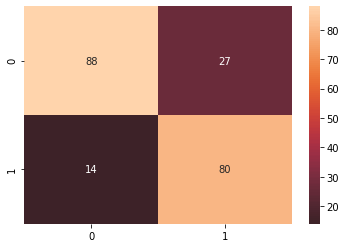

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), center=True, annot=True)